In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model, Input

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train_flat = x_train.reshape(-1, 784)
x_test_flat  = x_test.reshape(-1, 784)

x_train_img = x_train[..., np.newaxis]
x_test_img  = x_test[..., np.newaxis]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def build_dense_deep_ae():
    inp = Input(shape=(784,))
    x = layers.Dense(512, activation="relu")(inp)
    x = layers.Dense(256, activation="relu")(x)
    code = layers.Dense(64, activation="relu")(x)
    x = layers.Dense(256, activation="relu")(code)
    x = layers.Dense(512, activation="relu")(x)
    out = layers.Dense(784, activation="sigmoid")(x)
    model = Model(inp, out, name="DenseDeepAE")
    model.compile(optimizer="adam", loss="mse")
    return model
def build_cnn_ae():
    inp = Input(shape=(28, 28, 1))

    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inp)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    encoded = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    out = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    model = Model(inp, out, name="CNNAE")
    model.compile(optimizer="adam", loss="mse")
    return model

dense_ae = build_dense_deep_ae()
cnn_ae = build_cnn_ae()

EPOCHS = 20
BATCH = 256

print("\nTraining Dense Deep AE...")
hist_dense = dense_ae.fit(
    x_train_flat, x_train_flat,
    epochs=EPOCHS, batch_size=BATCH,
    validation_data=(x_test_flat, x_test_flat),
    verbose=1
)

print("\nTraining CNN AE...")
hist_cnn = cnn_ae.fit(
    x_train_img, x_train_img,
    epochs=EPOCHS, batch_size=BATCH,
    validation_data=(x_test_img, x_test_img),
    verbose=1
)

dense_val_loss = hist_dense.history["val_loss"][-1]
cnn_val_loss = hist_cnn.history["val_loss"][-1]

print("\n=== Final Validation Loss (MSE) ===")
print(f"Dense Deep AE: {dense_val_loss:.6f}")
print(f"CNN AE       : {cnn_val_loss:.6f}")



Training Dense Deep AE...
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0629 - val_loss: 0.0212
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0197 - val_loss: 0.0167
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0158 - val_loss: 0.0144
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0138 - val_loss: 0.0132
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0118 - val_loss: 0.0113
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0095 - val_loss: 0.0095
Epo

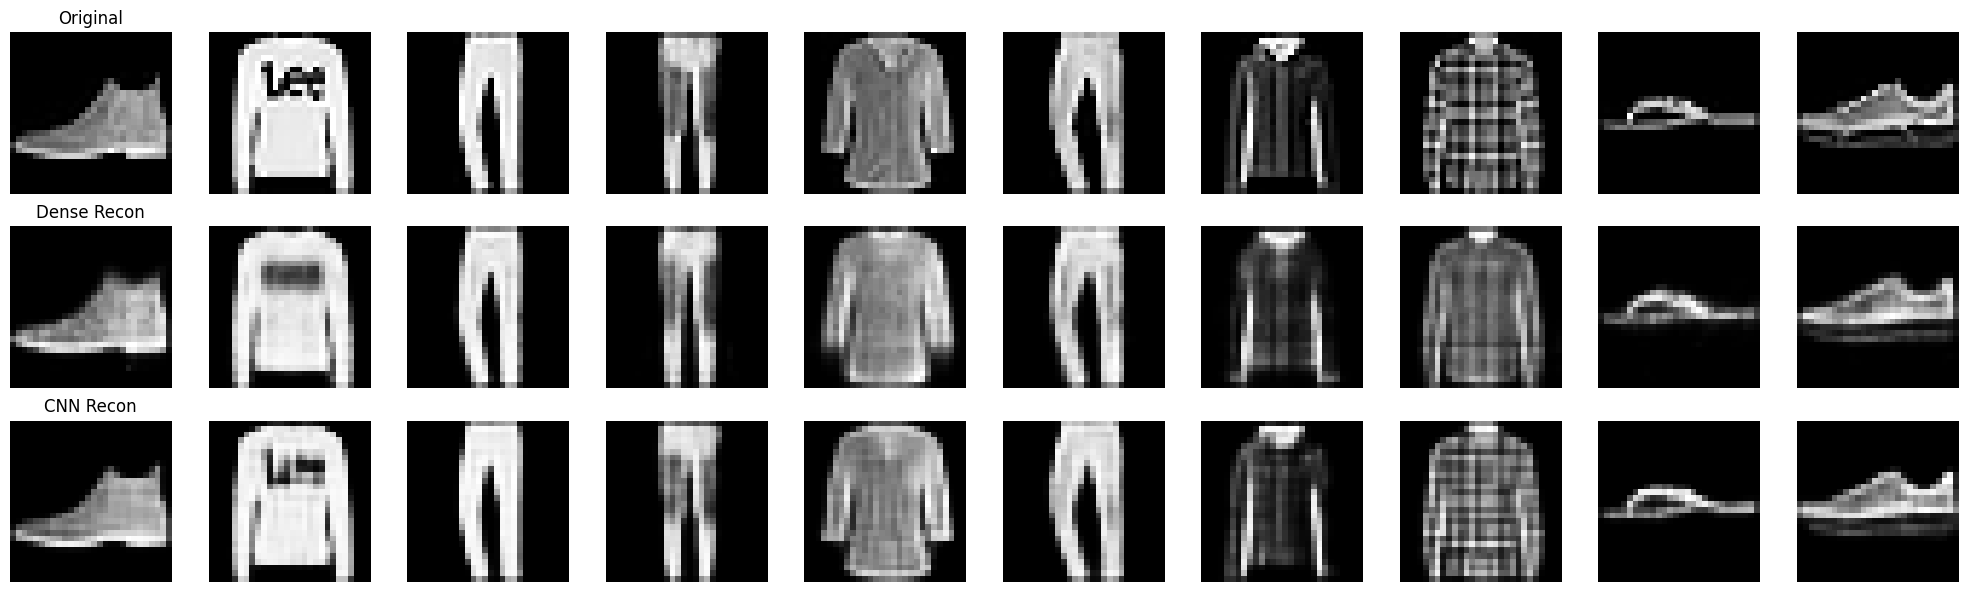

In [3]:

def plot_dense_vs_cnn(dense_model, cnn_model, x_test_flat, x_test_img, n=10):
    dense_preds = dense_model.predict(x_test_flat[:n], verbose=0).reshape(n, 28, 28)
    cnn_preds = cnn_model.predict(x_test_img[:n], verbose=0).reshape(n, 28, 28)

    plt.figure(figsize=(2*n, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test_flat[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
        if i == 0: ax.set_title("Original")

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(dense_preds[i], cmap="gray")
        plt.axis("off")
        if i == 0: ax.set_title("Dense Recon")


        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(cnn_preds[i], cmap="gray")
        plt.axis("off")
        if i == 0: ax.set_title("CNN Recon")

    plt.tight_layout()
    plt.show()

plot_dense_vs_cnn(dense_ae, cnn_ae, x_test_flat, x_test_img, n=10)
